### Ordinary Differential Equations: Initial Value Problems

In [181]:
import sys

sys.path.append('..')

### Example #1

$y'' = -0.1y' - x$, $y(0) = 0$, $y'(0) = 1$

$y' = z \Rightarrow \begin{bmatrix}
y' \\
z' \\
\end{bmatrix} = \begin{bmatrix}
z \\
-0.1z - x \\
\end{bmatrix} \Rightarrow f(x, y, z) = \begin{bmatrix}
z \\
-0.1z - x \\
\end{bmatrix}$ 

##### Finding $y = y(x)$ and $z = y'(x)$ using Euler's method

In [182]:
import numpy as np
from modules.ode.linear.initial_value import euler

def f(x: float, y: np.ndarray[float]) -> np.ndarray[float]:
    fx = np.zeros(len(y))
    
    fx[0] = y[1]
    fx[1] = -0.1*y[1] - x

    return fx

a = 0.
b = 2.

ya = np.array([0., 1.])

N = [5, 25, 125]

re = [euler(f, a, b, ya, n) for n in N]

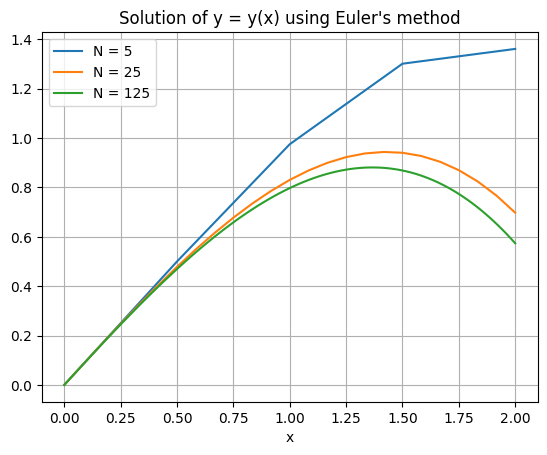

In [183]:
import matplotlib.pyplot as plt

for i in range(len(N)):
    plt.plot(re[i][0], re[i][1][:, 0], label=f'N = {N[i]}')

plt.title("Solution of y = y(x) using Euler's method")
plt.xlabel('x')
plt.grid()
plt.legend()

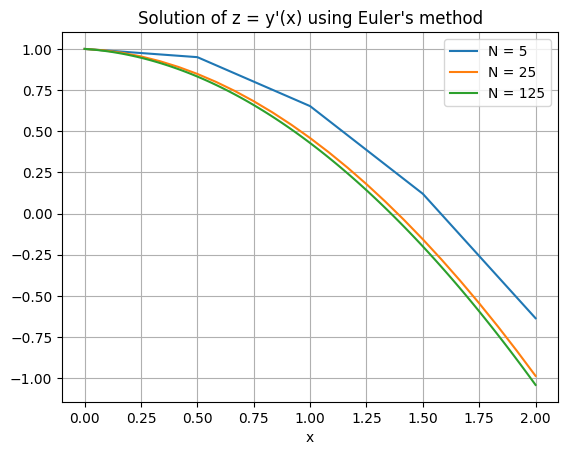

In [184]:
for i in range(len(N)):
    plt.plot(re[i][0], re[i][1][:, 1], label=f'N = {N[i]}')

plt.title("Solution of z = y'(x) using Euler's method")
plt.xlabel('x')
plt.grid()
plt.legend()

##### Finding $y = y(x)$ and $z = y'(x)$ using modified Euler's method

In [185]:
from modules.ode.linear.initial_value import modified_euler

rme = [modified_euler(f, a, b, ya, n) for n in N]

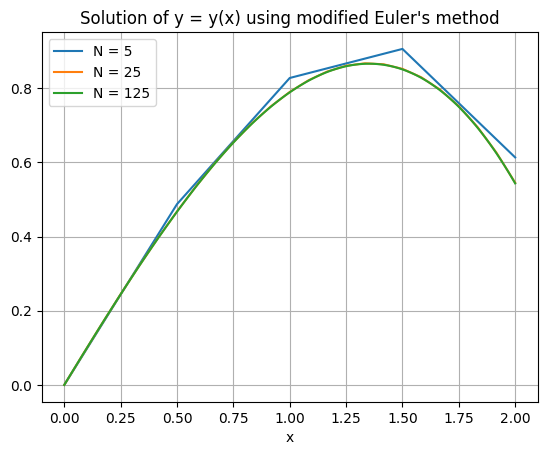

In [186]:
for i in range(len(N)):
    plt.plot(rme[i][0], rme[i][1][:, 0], label=f'N = {N[i]}')

plt.title("Solution of y = y(x) using modified Euler's method")
plt.xlabel('x')
plt.grid()
plt.legend()

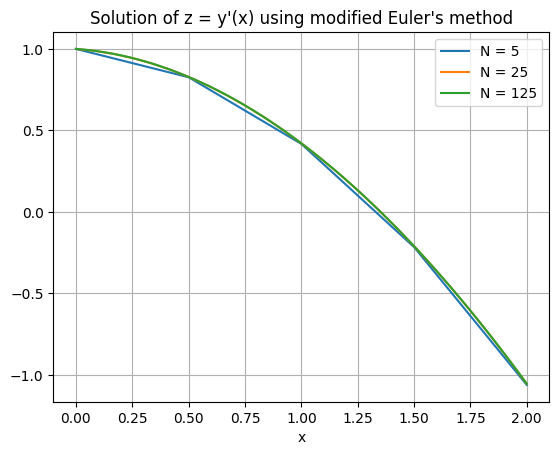

In [187]:
for i in range(len(N)):
    plt.plot(rme[i][0], rme[i][1][:, 1], label=f'N = {N[i]}')

plt.title("Solution of z = y'(x) using modified Euler's method")
plt.xlabel('x')
plt.grid()
plt.legend()

##### Comparison of the solutions $y = y(x)$

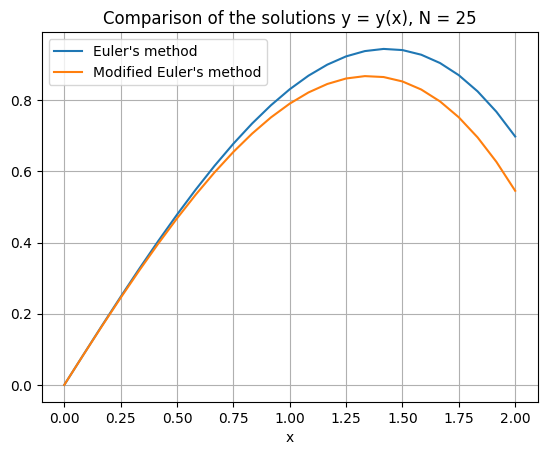

In [188]:
plt.plot(re[1][0], re[1][1][:, 0], label="Euler's method")
plt.plot(rme[1][0], rme[1][1][:, 0], label="Modified Euler's method")

plt.title(f"Comparison of the solutions y = y(x), N = {N[1]}")
plt.xlabel('x')
plt.grid()
plt.legend()

##### Comparison of the solutions $z = y'(x)$

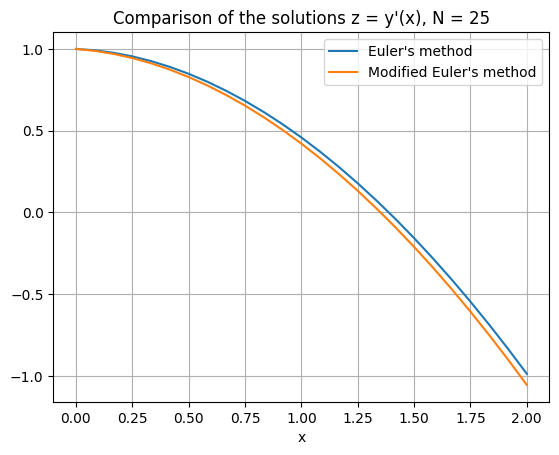

In [189]:
plt.plot(re[1][0], re[1][1][:, 1], label="Euler's method")
plt.plot(rme[1][0], rme[1][1][:, 1], label="Modified Euler's method")

plt.title(f"Comparison of the solutions z = y'(x), N = {N[1]}")
plt.xlabel('x')
plt.grid()
plt.legend()

### Example #2

$y'' = -1001y' - 1000y$, $y(0) = 0$, $y'(0) = 1$

$y' = z \Rightarrow \begin{bmatrix}
y' \\
z' \\
\end{bmatrix} = \begin{bmatrix}
z \\
-1001z - 1000y \\
\end{bmatrix} \Rightarrow f(x, y, z) = \begin{bmatrix}
z \\
-1001z - 1000y \\
\end{bmatrix}$ 

##### Finding $y = y(x)$ using Euler's method

In [190]:
def f(x: float, y: np.ndarray[float]) -> np.ndarray[float]:
    fx = np.zeros(len(y))
    
    fx[0] = y[1]
    fx[1] = -1001*y[1] - 1000*y[0]

    return fx

a = 0.
b = 2.
n = 25

ya = np.array([0., 1.])

re = euler(f, a, b, ya, n)

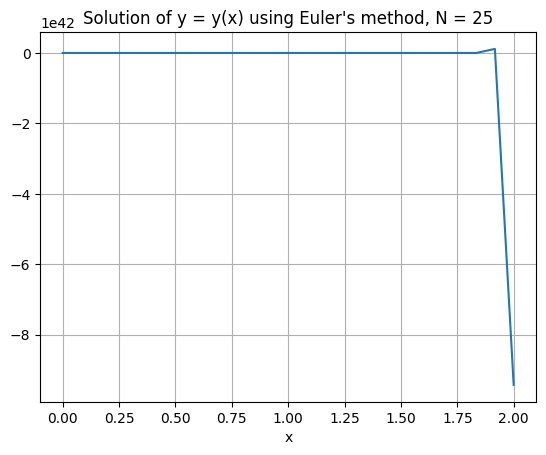

In [191]:
plt.plot(re[0], re[1][:, 0])
plt.title(f"Solution of y = y(x) using Euler's method, N = {n}")
plt.xlabel('x')
plt.grid()

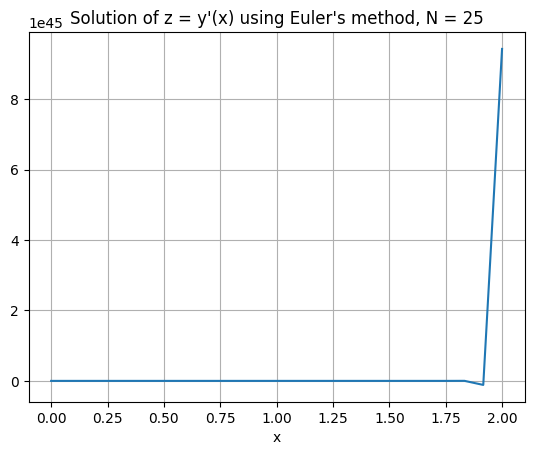

In [192]:
plt.plot(re[0], re[1][:, 1])
plt.title(f"Solution of z = y'(x) using Euler's method, N = {n}")
plt.xlabel('x')
plt.grid()

##### Finding $y = y(x)$ using modified Euler's method

In [193]:
rme = modified_euler(f, a, b, ya, n)

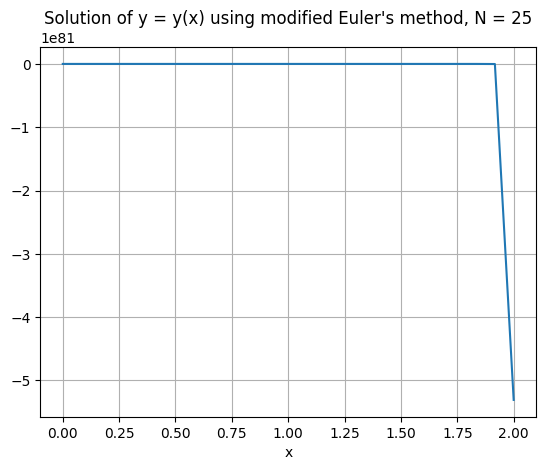

In [194]:
plt.plot(rme[0], rme[1][:, 0])
plt.title(f"Solution of y = y(x) using modified Euler's method, N = {n}")
plt.xlabel('x')
plt.grid()

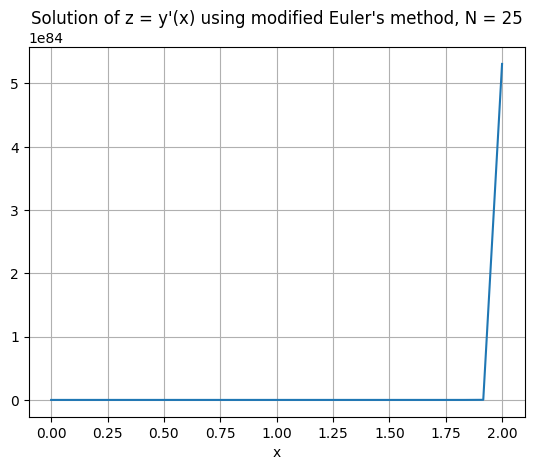

In [195]:
plt.plot(rme[0], rme[1][:, 1])
plt.title(f"Solution of z = y'(x) using modified Euler's method, N = {n}")
plt.xlabel('x')
plt.grid()

##### Finding $y = y(x)$ and $z = y'(x)$ using implicit Euler's method

$y'' = -1001y' - 1000y$, $y(0) = 0$, $y'(0) = 1$

$
\begin{cases}
    y' = z \\
    z' = -1001z - 1000y \\
\end{cases} \Rightarrow
$
$
\begin{cases}
    y_{i+1} - y_i = hz_{i+1} \\
    z_{i+1} - z_i = -1001hz_{i+1} - 1000hy_{i+1} \\
\end{cases} \Rightarrow
$
$
\begin{cases}
    y_{i+1} - hz_{i+1} = y_i \\
    (1 + 1001h)z_{i+1} + 1000hy_{i+1} = z_i \\
\end{cases}
$

In [196]:
from modules.slae.solver.direct.gauss_elimination import gauss_elimination

m = len(ya)
    
x = np.linspace(a, b, n)
y = np.zeros((n, m))

y[0] = ya
h = x[1] - x[0]

a = np.array([
    [1., -h],
    [1000.*h, 1. + 1001.*h]
])

for i in range(1, n):    
    y[i] = gauss_elimination(a.copy(), y[i-1].copy())

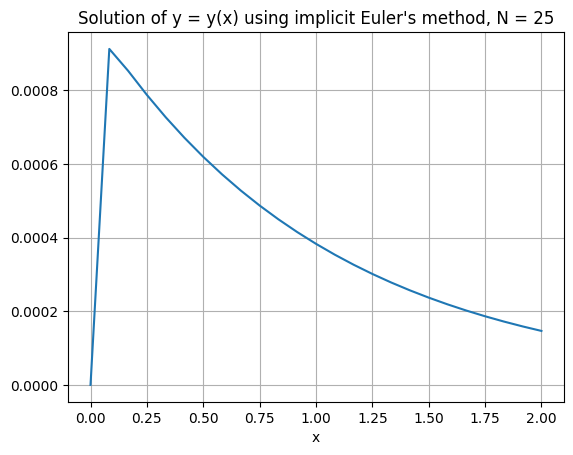

In [197]:
plt.plot(x, y[:, 0])
plt.title(f"Solution of y = y(x) using implicit Euler's method, N = {n}")
plt.xlabel('x')
plt.grid()

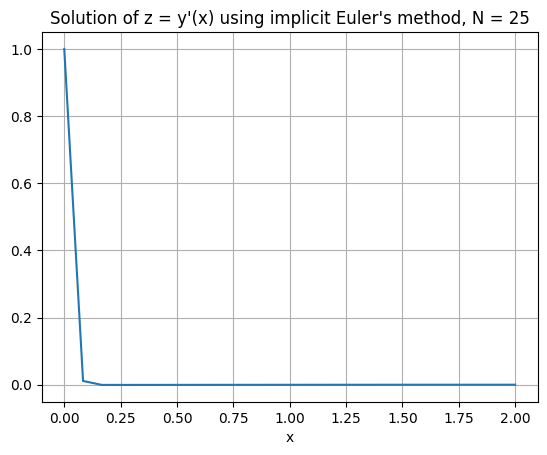

In [198]:
plt.plot(x, y[:, 1])
plt.title(f"Solution of z = y'(x) using implicit Euler's method, N = {n}")
plt.xlabel('x')
plt.grid()